In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from src.modeling_functions import get_results,plot_roc_curve,fit_and_get_logistic_coefficients,plot_lime_explanation

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the data
data = pd.read_csv('../Data/Telco-Customer-Churn-Encoded.csv')
y = data['Churn']
X = data.drop(columns = 'Churn')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,shuffle = True)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [3]:
# Fit the model and get coefficients
model_logistic,coef_df,y_pred,y_pred_train = fit_and_get_logistic_coefficients(X_train, X_test,y_train, y_test)
print("Logistic Regression Coefficients:")
print(coef_df)

Logistic Regression Coefficients:
             Feature  Coefficient
4             tenure    -1.358937
18      TotalCharges     0.673344
14          Contract    -0.663263
17    MonthlyCharges     0.381215
8     OnlineSecurity    -0.374694
7    InternetService     0.359620
11       TechSupport    -0.343644
5       PhoneService    -0.252656
16     PaymentMethod    -0.131617
3         Dependents    -0.116124
9       OnlineBackup     0.100294
15  PaperlessBilling    -0.096492
10  DeviceProtection    -0.094277
1      SeniorCitizen     0.086608
12       StreamingTV     0.079138
13   StreamingMovies     0.073415
2            Partner    -0.071972
6      MultipleLines     0.058453
0             gender    -0.007563


Metrics for test and train
Metrics for test
Accuracy: 0.7427
Precision: 0.5101
Recall: 0.8128
F1: 0.6268

Metrics for train
Accuracy: 0.7497
Precision: 0.5187
Recall: 0.8050
F1: 0.6309

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.81      0.63       561

    accuracy                           0.74      2110
   macro avg       0.71      0.77      0.72      2110
weighted avg       0.81      0.74      0.76      2110



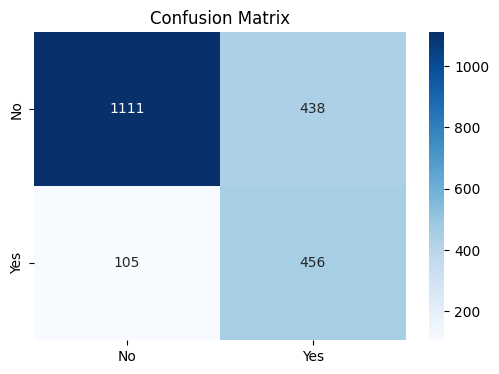

In [4]:
# Get metric results
get_results(y_test,y_pred,y_train,y_pred_train)


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


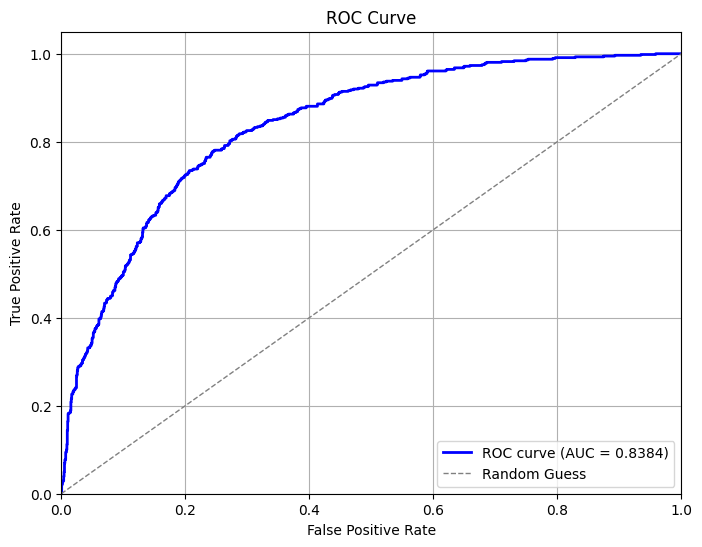

AUC: 0.8384


In [5]:
# Plot ROC curve
plot_roc_curve(model_logistic,X_test,y_test)

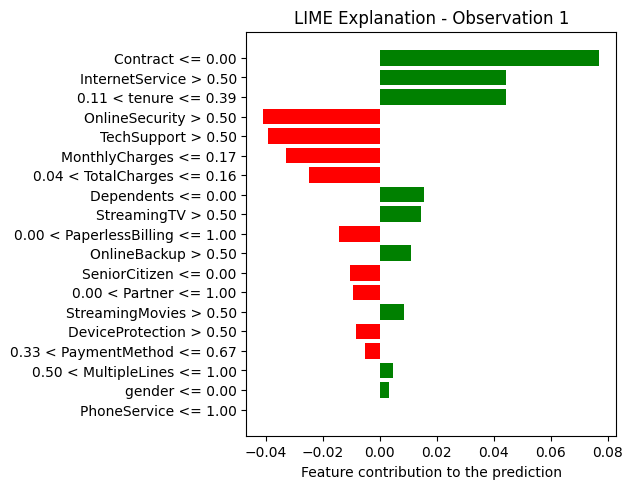

Predicted Probabilities: No Churn = 0.8417, Churn = 0.1583


In [6]:
# Plot LIME explanation for a specific instance
plot_lime_explanation(model_logistic,X_train,X_test,1,19)